<b>NOTE</b>
<br/>
In order to import the csv file data, you need to first put the csv file linear_reg_data.csv in the same folder as the notebook and you should change the filepath to the current one. The link to the file is 
<a href="https://study.iitr.ac.in/pluginfile.php/7915/mod_assign/introattachment/0/linear_reg_data.csv?forcedownload=1">linear_reg_data.csv</a>
<br/>
Otherwise, comment out the 3, 4, 7, 8 and 9th line from the below Code and hardcode the values of listx and listy from below

Below is the code to write the csv file data into two vectors x and y. We get
<br/>
<br/>
<b>listx</b> = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
<br/>
<br/>
<b>listy</b> = [6.972540119, 10.42671431, 13.08599394, 15.83065848, 18.26601864, 21.14399452, 23.92408361, 27.61017615, 30.22311501, 33.20807258, 35.39858449, 39.22590985, 41.96644264, 44.22433911, 47.07182497, 49.95140451, 52.95024224, 56.04875643, 58.83394502, 61.57122914, 64.76985289, 67.17549386, 70.20614465, 73.15836184, 76.12606998, 79.33317596, 81.62567378, 84.81823444, 87.77441457, 90.10645041, 93.54554485, 95.98652412, 98.75905159, 102.5208855, 105.415632, 108.1363973, 110.5106138, 113.1816721, 116.646233, 119.2801525] 

In [68]:
import csv
import numpy as np
filepath = open('C:\\Users\\laksh\\Python\\linear_reg_data.csv', 'r')
csvfile = csv.reader(filepath)
listx = []
listy = []
for row in csvfile:
    listx.append(int(row[0]))
    listy.append(float(row[1]))
x = np.array(listx)
y = np.array(listy)

Defining a function f(x) such as f(x) = a*x + b and initializing a and b for avoiding the warning

In [69]:
a = 1
b = 1
f = np.array(a*x + b)

Writing formula code to calculate Mean Square Error (MSE)

In [70]:
mse = np.square(np.subtract(y, f)).mean()

Now, from here, we can find the co-efficients of the function f(x) by mainly two methods. First, using <b>Least Square Method</b> and second using <b>Gradient Descent Method</b>. 
<br/>

<b>1) Least Square Method</b>
<br/>
We can find the co-efficients a and b by below formula codes. Calculating for a

In [71]:
a = (np.mean(x*y) - np.mean(x)*np.mean(y))/(np.mean(np.square(x)) - np.square(np.mean(x)))
print(a)

2.877385420664071


Similarly, the value of b can be find by the formula code below

In [72]:
b = np.mean(y) - a*np.mean(x)
print(b)

4.188864498861548


Hence, the co-efficients of regression line are a = 2.87738 and b = 4.18886Thus. Using the regression line, MSE is found out to be mse = 0.08529. The same can be found by the code below

In [73]:
mse = np.square(np.subtract(y, a*x + b)).mean()
print(mse)

0.08519353981129221


The scatter plot of the given data sets and the calculated regression line can be plotted using these lines of code

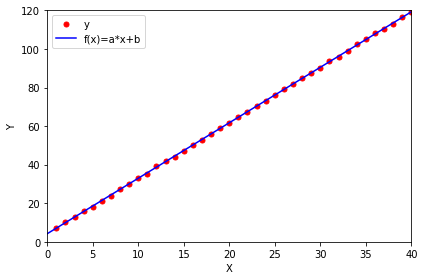

In [74]:
from matplotlib import pyplot as plt
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim([0, max(x)])
plt.ylim([0, max(y)+1])
plt.scatter(listx, listy, s=25, c='red', label='y')
x = np.linspace(0, 40)
y = a*x+b
plt.plot(x, y, '-b', label='f(x)=a*x+b')
plt.tight_layout()
plt.legend()
plt.show()

By observing the plot, we can say that our Least Square Method pretty much gives a close function for the given dataset

<b>2) Gradient Descent Method </b>

In this method, we define a cost function J(a_0, a_1) = [sigma(hi - yi)^2]/2n for h = a_0 + a_1*x. Then we take a step from the current values of a_0 and a_1 and analyze how far we should go until we get the closest possible value. The formulas for a_0 and a_1 are given by 
<br/>
a_0 = a_0 - (alfa)[sigma(hi - yi)]/n
<br/>
a_1 = a_1 - X(alfa)[sigma(hi - yi)]/n
<br/>
We can observe here that this term is similar as we could get by taking partial derivative of MSE wrt a and b in our first method. The code for the above formulas will be


In [75]:
a = [0, 0]
def h(a, X):
    return a[0] + a[1]*X
def costFunc(a, X, y):
    return (1/2)*np.square(h(a, X) - y).mean()

Defining the gradient descent function gradDesc to calculate how much we should move with help of alfa and epoch variables

In [76]:
n = len(x)
def gradDesc(a, X, y, epoch, alpha):
    cost = []
    i = 0
    while i < epoch:
        hx = h(a, X)
        a[0] -= alpha*(np.sum(hx - y)/n)
        a[1] -= (alpha * np.sum((hx - y) * X))/n
        cost.append(costFunc(a, X, y))
        i += 1
    return a, cost

Now we will create a function to predict the value of h using the gradient descent function define above

In [77]:
def predict(a, X, y, epoch, alpha):
    a, cost = gradDesc(a, X, y, epoch, alpha)
    return h(a, X), cost, a

Now, for a very small amount of step alpha = 0.001, using the predict function we can find h, cost and updated values of a[0] and a[1]. We make the prediction for epoch = 1000 (thousand iterations). The code for the same is below

In [78]:
predY, cost, a = predict(a, x, y, 1000, 0.001)

Now, using matplotlib library, we can plot the data

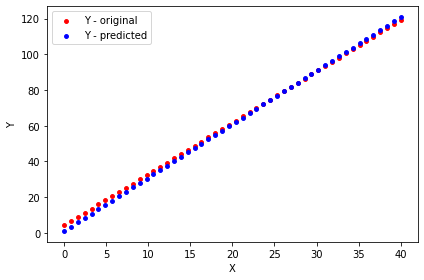

In [84]:
plt.scatter(x, y, label = 'Y - original', s=15, c='red')
plt.scatter(x, predY, label = 'Y - predicted', s=15, c='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.legend()
plt.show()

Here, predicted output is similar as the f(x) function we got in our first method. Instead of plotting discrete points, we can plot the straight line as follows

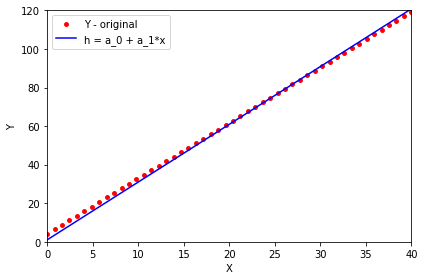

In [80]:
plt.xlim([0, max(x)])
plt.ylim([0, max(y)+1])
plt.scatter(x, y, label = 'Y - original', s=15, c='red')
plt.plot(x, predY, '-b', label='h = a_0 + a_1*x')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.legend()
plt.show()

Hence, we get our coefficients a_0 and a_1 as

In [81]:
print(a[0])
print(a[1])

1.037124000815103
2.994437731126289


The MSE can be calculated as 

In [82]:
mse = np.square(np.subtract(y, a[0] + a[1]*x)).mean()
print(mse)

2.5586222710166355
